In [1]:
import math 
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np
import time
num_of_samples=[]
for i in range(10):
    num_of_samples.append((2**i))
number_of_seq=10
pi=math.pi
imj=complex(0,1)


In [2]:
imj

1j

In [3]:
class dft(object):
    
    def __init__(self,sample_num,W_matrix):
        for i in range(sample_num):
            for j in range(sample_num):
                W_matrix[i][j]=(cmath.exp(-2*imj*(pi)*(i*j/sample_num)))
        self.W_matrix=W_matrix    
    
    def transform_direct(self,sample_seq):
        self.sample_seq=np.array(sample_seq)
        start=time.clock()
        self.dft_seq=np.matmul(self.W_matrix,self.sample_seq)
        end=time.clock()
        return (end-start)
    
    
    def transform_fast(self,sample_seq): 
        self.sample_seq=np.array(sample_seq)
        start=time.clock()
        X=np.matmul(self.W_matrix,self.sample_seq)
        K=np.conjugate(X[::-1])
        self.Dft_seq1=(X+K)/(2)
        self.Dft_seq2=(X-K)/(2*imj)
        end=time.clock()
        return (end-start)


In [4]:
time_direct=[]
time_fast=[]
for samp in num_of_samples:
    dft_direct_time1=0
    dft_direct_time2=0
    dft_fast_time=0
    for times in range(number_of_seq):
        sample_values1=[]
        sample_values2=[]
        sample_values_cmp=[]
        for val in range(samp):    
            x=random.randint(1,1001)
            y=random.randint(1,1001)
            sample_values1.append(x)
            sample_values2.append(y)
            sample_values_cmp.append(x+imj*y)

        mat=np.ndarray((samp,samp),dtype=complex)

        direct1=dft(samp,mat)
        dft_direct_time1+=direct1.transform_direct(sample_values1)

        dft_1=direct1.dft_seq

        direct2=dft(samp,mat)
        dft_direct_time2+=direct2.transform_direct(sample_values2)

        dft_2=direct2.dft_seq

        fast=dft(samp,mat)
        dft_fast_time+=fast.transform_fast(sample_values_cmp)

    time_direct.append((dft_direct_time1+dft_direct_time2)/number_of_seq)
    time_fast.append(dft_fast_time/number_of_seq)

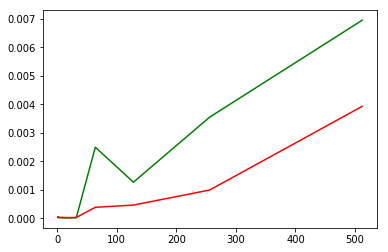

In [5]:
plt.plot(np.array(num_of_samples),np.array(time_direct),'-g')
plt.plot(np.array(num_of_samples),np.array(time_fast),'-r')

In [ ]:
def haar(n):
    H={}
    if n == 2:
        a=np.ndarray((2,2))
        a[0][0]=1
        a[0][1]=1
        a[1][0]=1
        a[1][1]=-1
        return a
    else:
        H=np.ndarray((n,n))
        D=haar(int(n/2))
        for i in range(int(n/2)):
            l=0
            for j in range(int(n/2)):
                x=(D[i][j]*np.array([1,1]))
                for k in range(2):
                    H[i][l]=x[k]
                    l+=1
                    
        I=(np.identity(int(n/2)))*(2**((math.log(n/2,2))/2))
        for i in range(int(n/2),n):
            p=0
            for j in range(int(n/2)):
                y=I[i-int(n/2)][j]*np.array([1,-1])
                for k in range(2):
                    H[i][p]=y[k]
                    p+=1
        return H